### 3-2. 모수적 모델

#### 가중치 기반 모델(Weight-Based Model)

- 특성(Feature)에 중요도를 나타내는 가중치를 곱하고 이를 합하여 출력(Output)을 생성하는 구조의 모델
> Ex) 선형회귀 모델
>
> $\hat{𝒚}=𝒇(\mathbf{𝐱})=\mathbf{𝐰}^𝑻\mathbf{𝐱}+𝒃$


#### 인공 신경망

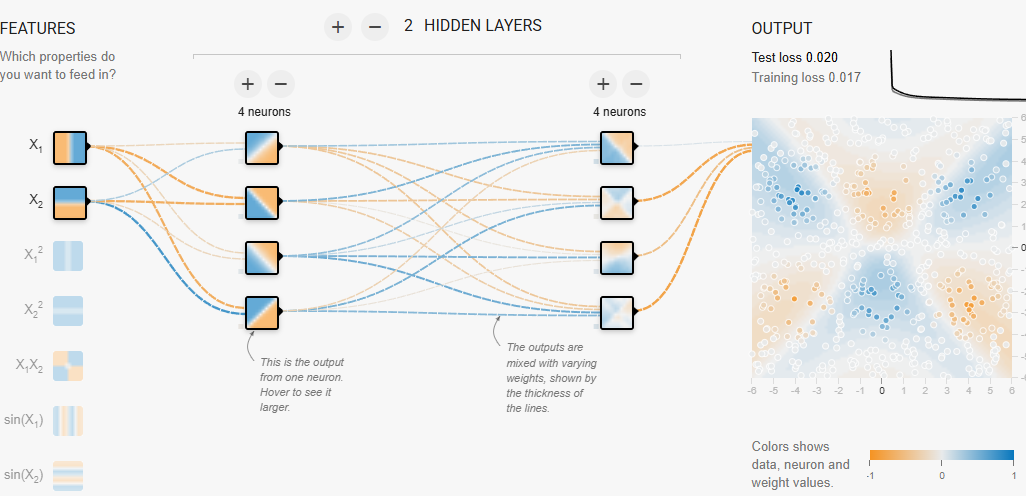

출처 : https://playground.tensorflow.org/

#### 학습
|   | 수식 기반 추정<br/>(Closed-Form Solution Estimation) | 최적화 알고리즘 기반 추정<br/>(Optimization-Based Estimation) |
| --- | --- | --- |
| 기본 개념 | 수식으로 가중치를 직접 계산 | 손실이 감소하는 방향으로 반복적 가중치 갱신 |
| 대표 알고리즘 | 정규 방정식 | 경사 하강법 |
| 장점 | 고정된 결과를 얻을 수 있음 | 높은 범용성<br/>점진적 학습 가능 |
| 단점 | 사용할 수 있는 모델이 제한적임 | 최적화 알고리즘 튜닝 필요<br/>초기값 설정에 따라 성능 차이가 있음 |
| 활용 모델 | 선형회귀 모델, Ridge 회귀 모델, … | 선형회귀 모델, 인공신경망, … |


#### 경사하강법(Gradient Descent)
- 목적 함수의 기울기를 따라 모수를 갱신하는 반복적 최적화 알고리즘
- 반복이 진행됨에 따라 목적 함수가 최적값에 가까워짐

> $\mathbf{\theta}=\mathbf{\theta}−\eta\nabla_{\mathbf{\theta}}𝐽(\theta)$
>
> $J(\mathbf{\theta})$: 목적 함수(Objective Function)
>
> $\eta$: 학습률(Learning Rate)

#### 선형회귀 모델 학습에 경사하강법 적용

$\hat{y}_i = \mathbf{w}^T\mathbf{x}_i + b$

$J = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \longleftarrow \text{MSE를 목적함수로 사용}$

$\nabla_{\mathbf{w}}J = \frac{1}{N}\sum_{i=1}^{N} \mathbf{x}_i(y_i - \hat{y}_i) = \frac{1}{N}X^T(\mathbf{y} - \hat{\mathbf{y}}) \quad \frac{\partial J}{\partial b} = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)$

$\mathbf{w} = \mathbf{w} - \eta\nabla_{\mathbf{w}}J(\mathbf{w})$

$b = b - \eta\frac{\partial J}{\partial b}(b)$

#### 경사하강법(Gradient Descent)의 과정

- 1. 모수 초기화
- 2. 손실과 기울기 계산
- 3. 모수 업데이트
- 4. 종료 조건을 충족 하지 않으면 2단계로 이동

※에폭(Epoch): 학습 데이터를 모두 사용하여 한 번 학습을 완료한 수행 단위


#### 학습률(Learning Rate)
- 적정 수준의 학습을 맞춰 주어야 함
- 너무 크면 불안정, 너무 작으면 느림

> $\mathbf{\theta}=\mathbf{\theta}−\eta\nabla_{\mathbf{\theta}}𝐽(\mathbf{\theta})$


#### 규제(Regularization)

- 모수가 지나치게 커지지 않게 제약을 걸어 주는 방법

- 규제 방식

|   | 규제함수 |
| --- | --- |
| L1 규제<br/>(L1 Regularization) |$\sum_{i=1}^k|\beta_i|$|
| L2 규제<br/>(L2 Regularization) |$\sum_{i=1}^k\beta_i^2$ |

- L1 규제 적용
> 손실함수에 규제 계수와 함께 가산
> 
> EX) $\text{Loss}=\sum_{i=1}^n(y_i-\hat{y}_i)^2$

- L1 규제 적용
$Loss = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{k} |\beta_i|$

- L2 규제 적용
$Loss = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{i=1}^{k} \beta_i^2$

#### L1 규제 vs L2 규제
- L1 규제: 모수를 0 으로 만들게 하는 성질이 강함
- L2 규제: 모수가 지나치게 커지지 않게 만들면서, 완전히 0 이 되지는 않게 함


|  | 단일 변수 규제함수 | 1차 도함수 |
|---|---|---|
| L1 규제<br>(L1 Regularization) | $\|\beta_i\|$ | $\begin{cases} if\ \beta_i > 0, 1 \\ if\ \beta_i = 0, \text{미분불가} \\ if\ \beta_i < 0, -1 \end{cases}$ |
| L2 규제<br>(L2 Regularization) | $\beta_i^2$ | $\beta_i$ |

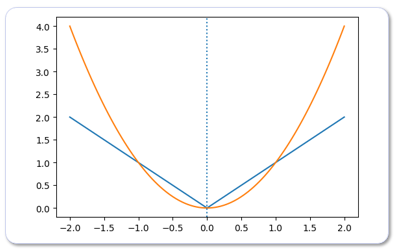

#### 규제가 적용된 선형회귀모델

|  | Ridge | Lasso | Elastic Net |
|---|---|---|---|
| 규제 | L2 규제 | L1 규제 | L1, L2 규제 |
| 손실 함수 | $\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda\sum_{i=1}^{k}\beta_i^2$ | $\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^{k}\|\beta_i\|$ | $\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^{k}\|\beta_i\| + \lambda\sum_{i=1}^{k}\beta_i^2$ |
| 수식 기반 추정 | $(X^TX - \lambda I)^{-1}X^Ty$ | 불가 | 불가 |
| 효과 | 안정화, 분산 감소, 다중공선성 완화 | 변수 선별 | Ridge + Lasso |

#### 장단점
- 입력 변수와 출력 변수의 관계가 정의한 함수와 부합
> Yes: 높은 일반화 성능, 구조의 규칙성에 의해 효율적인 연산
> No: 일반화 성능 저하, 성능 향상을 위한 특성 엔지니어링 필요

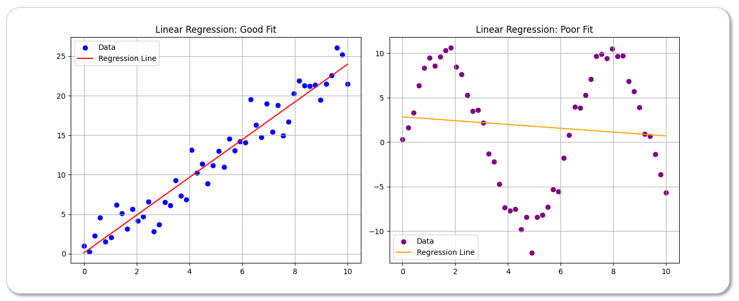

### 2. 나이브 베이즈(Naive Bayes)
- 나이브 베이즈
- 입력 변수들이 서로 독립(Independent)이라는 가정하에, 베이즈 정리를 활용해 사후 확률을 계산하고 이를 기반으로 분류하는 모델

$\hat{y} = \underset{c \in C}{\text{argmax}} \left( P(y) \prod_{i=1}^{n} P(X_i = x_i | y_i = c) \right)$

#### 나이브 베이즈(Naive Bayes) 유도과정

Bayes 룰, $P(y = c|X_1 = x_1, ..., X_k = x_k) = \frac{P(X_1 = x_1, ..., X_k = x_k|y = c)}{P(X_1 = x_1, ..., X_k = x_k)} P(y = c)$

입력 변수들이 독립이라는 가정, $P(X_1 = x_1, ..., X_k = x_k|y = c) = \prod_{i=1}^{n} P(X_i = x_i|y = c)$

$P(y = c|X_1 = x_1, ..., X_k = x_k) = \frac{\prod_{i=1}^{n} P(X_i = x_i|y = c)}{P(X_1 = x_1, ..., X_k = x_k)} P(y = c)$

$\hat{y} = \underset{c \in C}{\text{argmax}} \left( P(y = c) \prod_{i=1}^{n} P(X_i = x_i|y = c) \right)$

underflow에 대응, log를 취함 $\hat{y} = \underset{c \in C}{\text{argmax}} \left( \ln(P(y = c)) + \sum_{i=1}^{n} \ln(P(X_i = x_i|y = c)) \right)$

#### 종류

|   | 입력 변수 형태 | 조건부 확률의 분포 |
| --- | --- | --- |
| Bernoulli NB | 다수의 이진형 변수 | 베르누이 분포 |
| Multinomial NB | k 개 범주의 n 개의 시행에서의 빈도 | 다항 분포 |
| Gaussian NB | 연속형<br/>$X_i \sim N(\mu, \sigma^2)$가정 | 정규 분포 |

※ 다항분포 $P(X_1 = x_1, ..., X_k = x_k) = \frac{n!}{x_1! ... x_k!} p_1^{x_1} ... p_k^{x_k}$

$\mathbf{x} = [x_1, x_2, ..., x_k]$

k개의 사건 발생 빈도의 분포 $n = \sum_{i=1}^{k} x_i$

#### 학습


사전 확률 $P(y=c)$: $P(y = c) = \frac{\sum_{i=1}^{n} 1(y_i=c)}{n}$

조건부 확률

- y가 c인 데이터에서,

| | 확률질량(밀도)함수 | 조건부 확률의 분포 |
|---|---|---|
| Bernoulli NB<br>$P(X_i = x_i \vert y = c)$ | $p^{x_i}(1-p)^{1-x_i}$ | $p = \frac{\sum_{i=1}^{n} x_i + \alpha}{n + 2\alpha}$ |
| Multinomial NB<br>$P(X_{i1} = x_{i1},...X_{ik} = x_{ik} \vert y = c)$ | $\frac{(\sum_{j=1}^{k} x_{ij})!}{x_{i1}! ... x_{ik}!} p_1^{x_{i1}} ... p_k^{x_{ik}}$ | $p_k = \frac{\sum_{i=1}^{n} x_{i1} + \alpha}{\sum_{i=1}^{n} \sum_{j=1}^{k} x_{ij} + k\alpha'}...$ |
| Gaussian NB<br>$P(X_i = x_i \vert y = c)$ | $\frac{1}{\sqrt{2\pi\sigma_i^2}} e^{-\frac{(x_i-\mu_i)^2}{2\sigma^2}}$ | MLE 추정 : $\mu_i = \frac{1}{n}\sum_{i=1}^{n} x_i$ , $\sigma_i^2 = \frac{1}{n}\sum_{i=1}^{n} \frac{(x_i-\mu_i)^2}{n}$ |

#### 평활화(Smoothing)
- 미등장일 경우 클래스 확률이 0 이 되는 것을 방지
- 분산과 편향 조절



- α: 평활화 계수 (α=1 인 경우 Laplace Smoothing, α>0 인 경우 Lidstone Smoothing)

| α | 편향(Bias) | 분산(Variance) | 의미 |
| --- | --- | --- | --- |
| 작을수록(α→0) | 작아짐 | 커짐 | 데이터에 민감 |
| 클수록(α→1) | 커짐 | 작아짐 | 보수적 예측 |

#### 장단점

| 장점 | 단점 |
| --- | --- |
| 빠른 학습과 예측<br/>적은 데이터로도 잘 작동<br/>고차원 데이터에 강함<br/>구현이 간단하고 직관적<br/>점진적 학습 가능<br/>특정 조건에서는 최적<br/>분류 기준 해석 용이| 독립성 가정에 어긋날수록 성능 저하의 여지가 큼<br/>모델의 유연성이 낮음<br/>연속형+범주형의 혼합이 어려움 |